# ADVANCE RANDOM FOREST CLASSIFIER

Random Forest is kind of classification algorithm consisting of many Decision Tree Classifier. This algorithm works by following these steps: 
1. Select random samples from a given dataset.
2. Construct a decision tree for each sample.
3. Get prediction result from each decision tree.
4. Perform vote for each predicted result.
5. Select the predicted result with the most votes as final prediction.

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

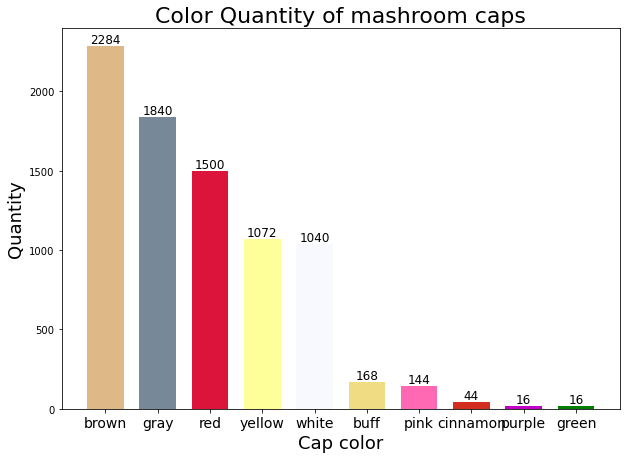

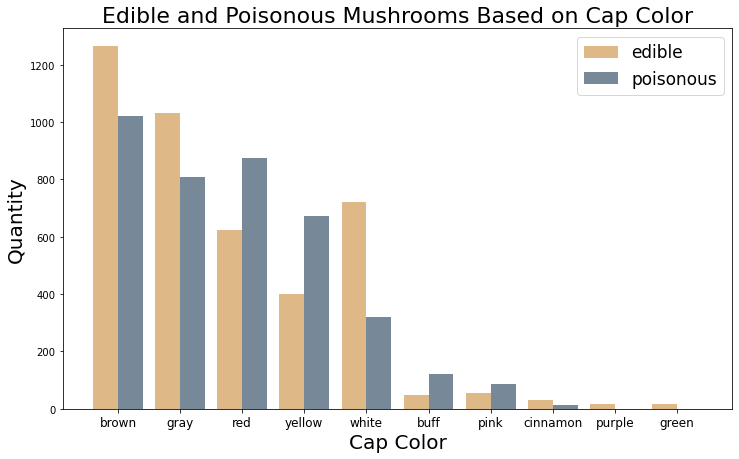

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0        

<ipython-input-9-956ad71ad20a>:135: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.DataFrame(X).hist(ax = ax)


{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 10}


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(



Error Matrix : 
 [[820   0]
 [  0 805]]

Accuracy 100.0


[Text(358.7142857142857, 516.4200000000001, 'X[18] <= 0.671\ngini = 0.499\nsamples = 4094\nvalue = [3404, 3095]'),
 Text(149.46428571428572, 462.06000000000006, 'X[13] <= 0.36\ngini = 0.387\nsamples = 2112\nvalue = [877, 2471]'),
 Text(89.67857142857143, 407.70000000000005, 'X[13] <= -1.481\ngini = 0.074\nsamples = 1184\nvalue = [72, 1801]'),
 Text(59.785714285714285, 353.34000000000003, 'X[11] <= -0.121\ngini = 0.278\nsamples = 282\nvalue = [72, 359]'),
 Text(29.892857142857142, 298.98, 'gini = 0.0\nsamples = 233\nvalue = [0, 359]'),
 Text(89.67857142857143, 298.98, 'gini = 0.0\nsamples = 49\nvalue = [72, 0]'),
 Text(119.57142857142857, 353.34000000000003, 'gini = 0.0\nsamples = 902\nvalue = [0, 1442]'),
 Text(209.25, 407.70000000000005, 'X[8] <= -1.218\ngini = 0.496\nsamples = 928\nvalue = [805, 670]'),
 Text(179.35714285714286, 353.34000000000003, 'gini = 0.0\nsamples = 424\nvalue = [0, 645]'),
 Text(239.14285714285714, 353.34000000000003, 'X[12] <= 1.326\ngini = 0.058\nsamples = 50

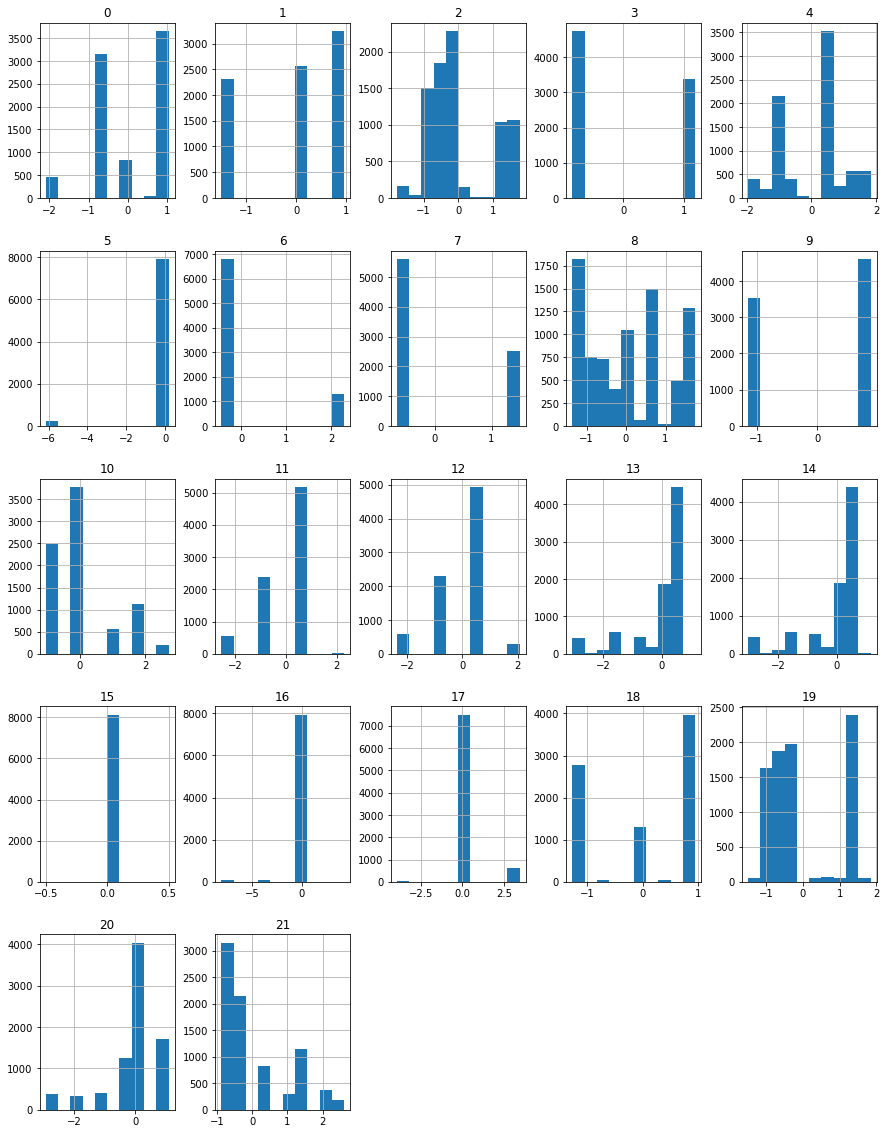

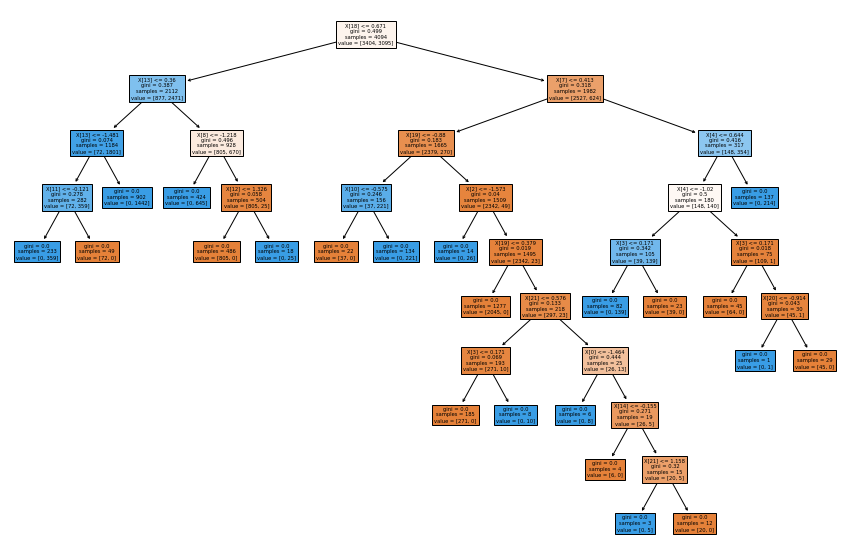

In [9]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold

#Reading dataset
dataset = pd.read_csv("E:\\ML Zero to Hero\\mushrooms.csv")

#Getting top 5 rows of dataset
print(dataset.head())

#Getting shape of dataset
print(dataset.shape)

#Finding any missing values in all column
dataset.isna().sum(axis = 0)

#Finding unique values in all column
for i in dataset.columns:
    print(f'{i} = {dataset[i].unique()} ')
    
    

#-------------------------Performing exploratory data analysis----------------------------------------#

#Finding number of mushrooms for each cap color
cap_color = dataset['cap-color'].value_counts()
print(cap_color)

#Storing values of cap colors into list
mushroom_height = cap_color.values.tolist()

#Storing row labels of each cap color into another list
cap_color.axes
cap_color_label = cap_color.axes[0].tolist()
print(cap_color_label)

#--------------------------Visualization of mushrooms quantity w.r.t cap-color---------------------------#

#x location for the group
ind = np.arange(10)

#Width of the bar
width = 0.7

#selecting colors for the 10 bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']

figure, axes = plt.subplots(figsize=(10, 7))
mashroom_bars = axes.bar(ind, mushroom_height, width, color=colors)

#Adding text to title, bars and etc
axes.set_title('Color Quantity of mashroom caps', fontsize = 22)
axes.set_xlabel('Cap color', fontsize = 18)
axes.set_ylabel('Quantity', fontsize = 18)
#Set positioning on the x-axis
axes.set_xticks(ind)
axes.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'), fontsize = 14)

#Auto-label number of mashroom for each bar
def autolabel(rects, fontsize = 12):
    
    for rect in rects:
        height = rect.get_height()
        axes.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height), ha='center', va='bottom',fontsize=fontsize)
        

        
autolabel(mashroom_bars)
plt.show()


#--------------------------Barchart to show edible and poisonous mashrooms on basis of cap-------------------------#
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_label:
    size = len(dataset[dataset['cap-color'] == capColor].index)
    edibles = len(dataset[(dataset['cap-color'] == capColor) & (dataset['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color= '#DEB887')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#778899')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

#Preprocess the dataset
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for column in dataset.columns:
    dataset[column] = LE.fit_transform(dataset[column])
    

#Check if any missing value (NaN) exists
print(dataset.isnull().sum(axis = 0))

#Grouping data by class column which is our target
dataset.groupby('class').size()

#Extract features
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif
x = dataset
x = x.drop(columns=['class'])
print(x.head())

y = dataset['class']

#Feature scaling the features
from sklearn.preprocessing import StandardScaler
stand_x = StandardScaler()
X = stand_x.fit_transform(x)

#----------------------------------------Visualizing Histogram-----------------------------------#

fig = plt.figure(figsize = (15,20))
ax = fig.gca() 
pd.DataFrame(X).hist(ax = ax)


#Splitting dataset into train and test set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


#Finding optimal value
param_grid = {
    'max_depth': [1,5,10,15],
    'n_estimators' : [10,100,500,1000],
    'min_samples_leaf' : [1,2,3,4,5,10,15,20,30,40,50]
    }

grid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,max_features = 'sqrt'), param_grid=param_grid,cv=10)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

optimal_estimators = grid_search.best_params_.get("n_estimators")
optimal_depth = grid_search.best_params_.get("max_depth")
optimal_leaf = grid_search.best_params_.get("min_samples_leaf")

#Train the model using RandomForstClassifier

model = RandomForestClassifier(n_estimators = optimal_estimators, max_depth = optimal_depth, min_samples_leaf = optimal_leaf)
k_fold = KFold(n_splits = 10, random_state=123)
model.fit(x_train, y_train)

#Drawing prediction
predictions = cross_val_predict(model, x_test, y_test, cv = k_fold)

#Finding confusion matrix and error
EM = confusion_matrix(y_test, predictions)
Acc = accuracy_score(y_test, predictions)

#Printing the error matrix and accuracy
print("\nError Matrix : \n", EM)
print("\nAccuracy", str(round(Acc * 100)))

#--------------------------VISUALIZING RANDOM FOREST--------------------------------#
x = dataset.drop(columns = ['class'])
x_cols = x.columns
x_cols = x_cols.tolist()

import sklearn.tree as tree
plt.figure(figsize = (15,10))
tree.plot_tree(model.estimators_[0], filled = True)

#Above code will visualize only one tree

#If you want to visualize all trees in random forest
#for i in range(0, len(model.estimators_)):
    #Follow the above code